In [6]:
%load_ext autoreload
%autoreload 2
import os
import sys
from  partie1 import GRUEncoderGD, GRUDecoderGD
from  partie1 import GRUEncoderDG, GRUDecoderDG
from  partie1 import BiGRUEncoder, BiGRUDecoder
from partie1 import LSTMEncoder, LSTMDecoder
from partie1 import TensorProductEncoder

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
##### entiers 0-10 
def generate_data(batch_size, seq_len, min_val=0, max_val=10):
    return torch.randint(min_val, max_val, (batch_size, seq_len))

def precision(predicted, target):
    correct = (predicted.argmax(dim=-1) == target).float()
    return correct.mean().item() * 100

# Gauche droite

## **GRU**

### TRAIN

Epoch [10/50000], Loss: 2.3063, Accuracy: 11.87%
Epoch [20/50000], Loss: 2.3163, Accuracy: 8.12%
Epoch [30/50000], Loss: 2.3110, Accuracy: 8.12%
Epoch [40/50000], Loss: 2.3070, Accuracy: 8.12%
Epoch [50/50000], Loss: 2.3015, Accuracy: 11.87%
Epoch [60/50000], Loss: 2.3035, Accuracy: 6.88%
Epoch [70/50000], Loss: 2.2999, Accuracy: 12.50%
Epoch [80/50000], Loss: 2.3089, Accuracy: 5.62%
Epoch [90/50000], Loss: 2.3034, Accuracy: 10.00%
Epoch [100/50000], Loss: 2.3032, Accuracy: 10.63%
Epoch [110/50000], Loss: 2.3026, Accuracy: 6.88%
Epoch [120/50000], Loss: 2.3030, Accuracy: 12.50%
Epoch [130/50000], Loss: 2.3007, Accuracy: 10.00%
Epoch [140/50000], Loss: 2.3025, Accuracy: 15.62%
Epoch [150/50000], Loss: 2.2959, Accuracy: 16.25%
Epoch [160/50000], Loss: 2.2870, Accuracy: 10.00%
Epoch [170/50000], Loss: 2.2661, Accuracy: 9.38%
Epoch [180/50000], Loss: 2.2695, Accuracy: 10.63%
Epoch [190/50000], Loss: 2.2707, Accuracy: 11.87%
Epoch [200/50000], Loss: 2.2519, Accuracy: 18.75%
Epoch [210/50000

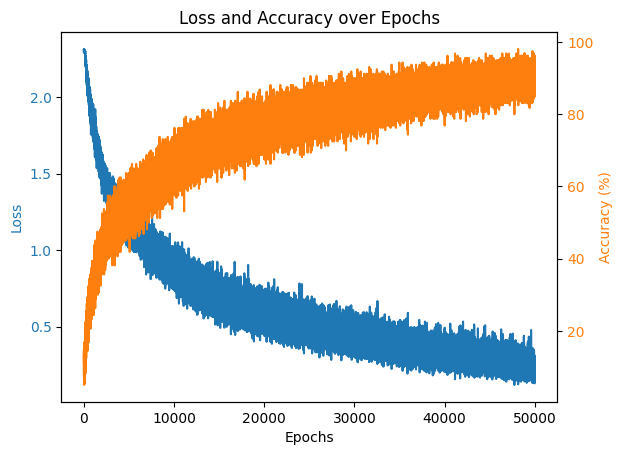

In [8]:

input_size = 10
emb_size = 16
hidden_size = 32
output_size = 10

batch_size = 16
seq_len = 10
epochs = 50000
learning_rate = 0.001

encoder = GRUEncoderGD(input_size, emb_size, hidden_size)
decoder = GRUDecoderGD(emb_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss mieux adapté pour des classes discrètes
optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=learning_rate)

losses = []
accuracies = []

for epoch in range(epochs):
    x = generate_data(batch_size, seq_len)
    target = x.clone()

    hidden = encoder(x)
    reconstructed_x = decoder(hidden, seq_len)

    loss = criterion(reconstructed_x.view(-1, output_size), target.view(-1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = precision(reconstructed_x, target)
    losses.append(loss.item())
    accuracies.append(accuracy)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")



torch.save(encoder, "./models/GD/gru_enc.pth")
torch.save(decoder, "./models/GD/gru_dec.pth")


fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(range(epochs), losses, color='tab:blue', label='Loss')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy (%)', color='tab:orange')  
ax2.plot(range(epochs), accuracies, color='tab:orange', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:orange')


plt.title('Loss and Accuracy over Epochs')

plt.savefig(f"./resultats/GD/training_gru_{epochs}_epochs.png")
plt.show()

### EVAL

/tmp/ipykernel_15661/3588273814.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder = torch.load("./models/GD/gru_enc.pth")
/tmp/ipykernel_15661/3588273814.py:2: Fut

93.03412504911422


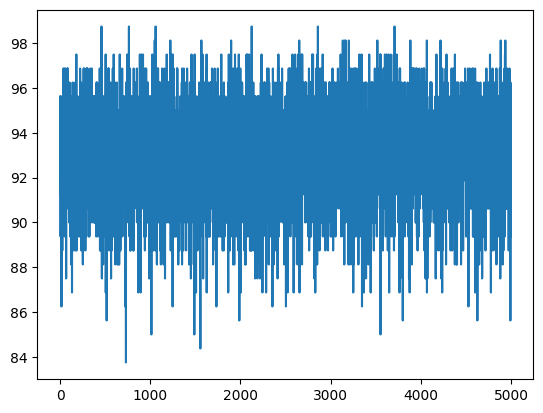

In [13]:
encoder = torch.load("./models/GD/gru_enc.pth")
decoder = torch.load("./models/GD/gru_dec.pth")

encoder.eval()
decoder.eval()

n_iter = 5000
accuracies = []
for _ in range(n_iter):
    x = generate_data(batch_size, seq_len)
    # print(x)
    # target = x.clone()

    hidden = encoder(x)
    reconstructed_x = decoder(hidden, seq_len)

    accuracy = precision(reconstructed_x, x)

    accuracies.append(accuracy)


plt.plot(accuracies)
print(np.array(accuracies).mean())

## **LSTM**

### TRAIN

Epoch [10/50000], Loss: 2.3066, Accuracy: 8.12%
Epoch [20/50000], Loss: 2.3022, Accuracy: 8.75%
Epoch [30/50000], Loss: 2.3021, Accuracy: 10.63%
Epoch [40/50000], Loss: 2.3056, Accuracy: 8.75%
Epoch [50/50000], Loss: 2.3033, Accuracy: 11.25%
Epoch [60/50000], Loss: 2.3064, Accuracy: 8.75%
Epoch [70/50000], Loss: 2.3015, Accuracy: 11.87%
Epoch [80/50000], Loss: 2.3045, Accuracy: 7.50%
Epoch [90/50000], Loss: 2.3000, Accuracy: 13.12%
Epoch [100/50000], Loss: 2.3052, Accuracy: 8.12%
Epoch [110/50000], Loss: 2.3017, Accuracy: 12.50%
Epoch [120/50000], Loss: 2.3012, Accuracy: 11.87%
Epoch [130/50000], Loss: 2.3082, Accuracy: 5.62%
Epoch [140/50000], Loss: 2.2992, Accuracy: 11.25%
Epoch [150/50000], Loss: 2.3027, Accuracy: 10.63%
Epoch [160/50000], Loss: 2.2926, Accuracy: 13.75%
Epoch [170/50000], Loss: 2.2755, Accuracy: 18.13%
Epoch [180/50000], Loss: 2.2673, Accuracy: 14.37%
Epoch [190/50000], Loss: 2.2705, Accuracy: 11.25%
Epoch [200/50000], Loss: 2.2671, Accuracy: 15.00%
Epoch [210/50000

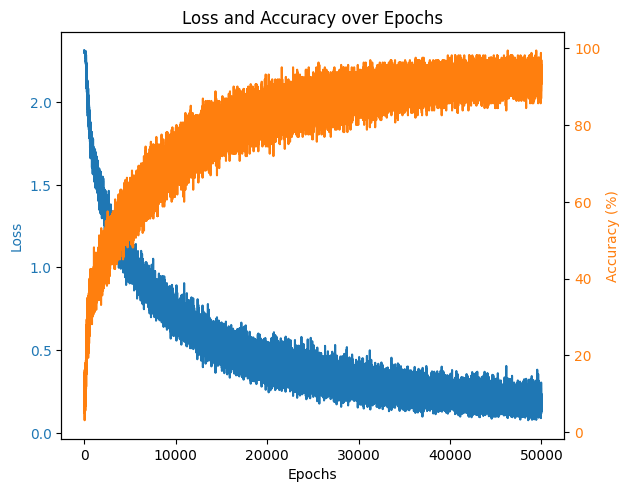

In [15]:
input_size = 10
emb_size = 16
hidden_size = 32
output_size = 10

batch_size = 16
seq_len = 10
epochs = 50000
learning_rate = 0.001

encoder = LSTMEncoder(input_size, emb_size, hidden_size)
decoder = LSTMDecoder(emb_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss mieux adapté pour des classes discrètes
optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=learning_rate)

losses = []
accuracies = []
for epoch in range(epochs):
    x = generate_data(batch_size, seq_len)
    target = x.clone()

    hidden = encoder(x)
    reconstructed_x = decoder(hidden, seq_len)

    loss = criterion(reconstructed_x.view(-1, output_size), target.view(-1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = precision(reconstructed_x, target)
    losses.append(loss.item())
    accuracies.append(accuracy)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")


torch.save(encoder, "./models/GD/lstm_enc.pth")

torch.save(decoder, "./models/GD/lstm_dec.pth")


fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(range(epochs), losses, color='tab:blue', label='Loss')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy (%)', color='tab:orange')  
ax2.plot(range(epochs), accuracies, color='tab:orange', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:orange')


fig.tight_layout()  
plt.title('Loss and Accuracy over Epochs')

plt.savefig(f"./resultats/training_lstm_{epochs}_epochs.png")
plt.show()



### EVAL

/tmp/ipykernel_4847/1528415794.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder = torch.load("./models/lstm_enc.pth")
/tmp/ipykernel_4847/1528415794.py:2: FutureW

93.14937499523163


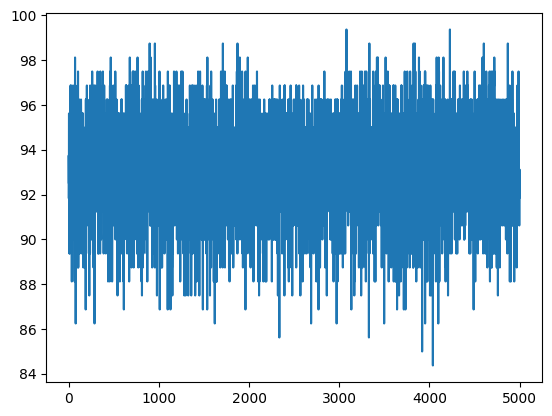

In [23]:
encoder = torch.load("./models/lstm_enc.pth")
decoder = torch.load("./models/lstm_dec.pth")

encoder.eval()
decoder.eval()

n_iter = 5000
accuracies = []
for _ in range(n_iter):
    x = generate_data(batch_size, seq_len)
    # print(x)
    # target = x.clone()

    hidden = encoder(x)
    reconstructed_x = decoder(hidden, seq_len)

    accuracy = precision(reconstructed_x, x)

    accuracies.append(accuracy)


plt.plot(accuracies)
print(np.array(accuracies).mean())

## **TPDN**

### TRAIN

/tmp/ipykernel_2032505/982479531.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder = torch.load("./models/GD/gru_enc.pth")


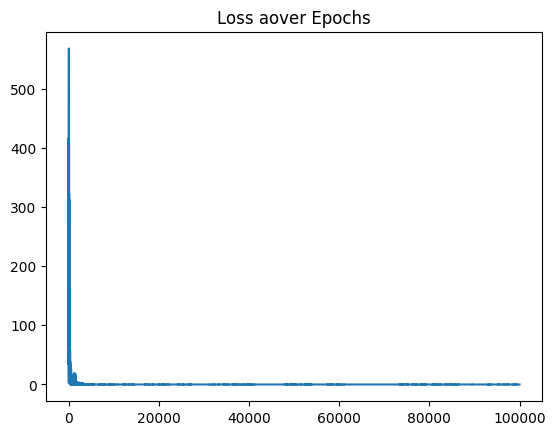

In [9]:
input_size = 10
emb_size = 16
hidden_size = 32
output_size = 10

batch_size = 1
seq_len = 10
epochs = 100000
learning_rate = 0.01
seq_len_tensor = torch.tensor([seq_len])


encoder = torch.load("./models/GD/gru_enc.pth")
tpdnencoder = TensorProductEncoder(n_roles=seq_len, n_fillers=seq_len, filler_dim=hidden_size, role_dim=hidden_size, hidden_size=hidden_size)

def generate_data(batch_size, seq_len, input_size):
    data = torch.randint(0, input_size, (batch_size, seq_len))  # fillers
    roles = torch.arange(seq_len).unsqueeze(0).expand(batch_size, -1)  # rôles
    return data, roles

criterion = nn.MSELoss()
optimizer = optim.Adam(tpdnencoder.parameters(), lr=learning_rate)

encoder.eval()
tpdnencoder.train()
losses = []
for epoch in range(epochs):

    data, roles = generate_data(batch_size, seq_len, input_size)

    encoder_output = encoder(data).squeeze(0)  
    tpdn_output = tpdnencoder(data, roles)
    # reconstructed_x = decoder(tpdn_output.unsqueeze(0), seq_len_tensor)
    loss = criterion(encoder_output, tpdn_output)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

torch.save(tpdnencoder, "./models/GD/tpdn_gru.pth")


plt.plot(losses)
plt.title('Loss aover Epochs')
plt.show()



In [10]:
def plot_tensors(tensor1, tensor2, labels=("Tensor 1", "Tensor 2")):

    tensor1 = tensor1.flatten()
    tensor2 = tensor2.flatten()
    x_indices = range(len(tensor1))


    plt.figure(figsize=(10, 6))
    plt.plot(x_indices, tensor1.detach().numpy(), label=labels[0], marker='o')
    plt.plot(x_indices, tensor2.detach().numpy(), label=labels[1], marker='x')

    plt.title("Comparaison des valeurs des tenseur en fonction de l'indice")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

tensor([[3, 2, 4, 5, 6, 6, 0, 2, 9, 7]])


/tmp/ipykernel_2032505/3269712745.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder = torch.load("./models/GD/gru_enc.pth")
/tmp/ipykernel_2032505/3269712745.py:2:

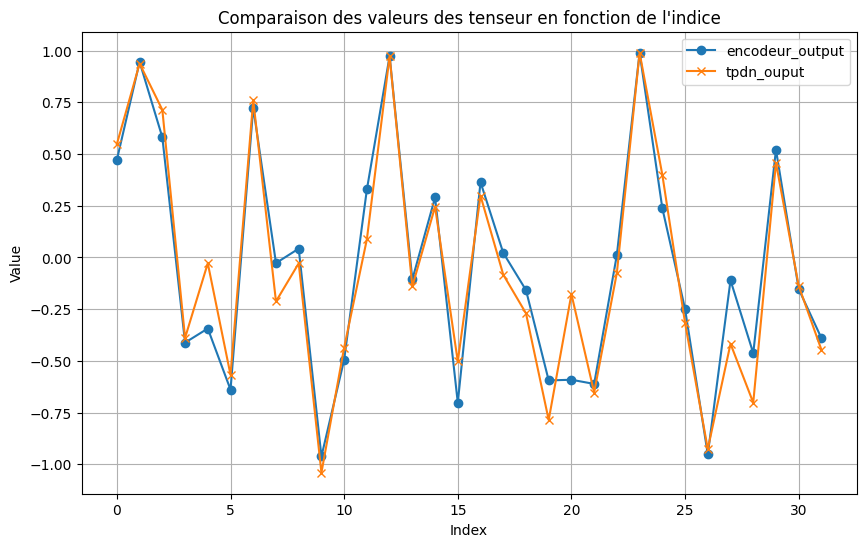

In [12]:
encoder = torch.load("./models/GD/gru_enc.pth")
tpdnencoder = torch.load("./models/GD/tpdn_gru.pth")
input_size = 10
emb_size = 16
hidden_size = 32
output_size = 10

batch_size = 1
seq_len = 10
epochs = 10000
learning_rate = 0.01
seq_len_tensor = torch.tensor([seq_len])

def generate_data(batch_size, seq_len, input_size):
    data = torch.randint(0, input_size, (batch_size, seq_len))  # fillers
    roles = torch.arange(seq_len).unsqueeze(0).expand(batch_size, -1)  # rôles
    return data, roles

data2, roles2 = generate_data(batch_size, seq_len, input_size)
encoder_output2 = encoder(data2).squeeze(0)  
tpdn_output2 = tpdnencoder(data2, roles2) 
print(data2)
plot_tensors(encoder_output2, tpdn_output2, labels = ("encodeur_output","tpdn_ouput"))


In [16]:
encoder = torch.load('./models/GD/gru_enc.pth')
tpdnencoder = torch.load('./models/GD/tpdn_gru.pth')
decoder = torch.load("./models/GD/gru_dec.pth")

encoder.eval()
tpdnencoder.eval()
decoder.eval()

### TEST
precisionsgru = []
precisionstpdn = []
for _ in range(100):
    data, roles = generate_data(batch_size, seq_len, input_size)

    encoder_output = encoder(data)  # (seq_len, batch_size, hidden_size)
    tpdn_output = tpdnencoder(data, roles)  # (batch_size, hidden_size)
    loss = criterion(encoder_output, tpdn_output)

    seq_len_tensor = torch.tensor([seq_len])


    reconstructed_tpdn = decoder(tpdn_output.unsqueeze(0), seq_len_tensor).argmax(dim=1)
    reconstructed_gru = decoder(encoder_output, seq_len_tensor).argmax(dim=1)
    print()
    print( "DATA : " ,data)
    print("GRU : ", reconstructed_gru)
    print( "TPDN : ", reconstructed_tpdn)
    print()
    precisionsgru.append(precision(reconstructed_gru, data))
    precisionstpdn.append(precision(reconstructed_tpdn, data))

print( np.array(precisionsgru).mean())
print( np.array(precisionstpdn).mean())

/tmp/ipykernel_2032505/1120392934.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder = torch.load('./models/GD/gru_enc.pth')
/tmp/ipykernel_2032505/1120392934.py:2:


DATA :  tensor([[0, 0, 3, 0, 9, 8, 7, 8, 7, 6]])
GRU :  tensor([[0, 3, 4, 2, 4, 4, 9, 8, 7, 4]])
TPDN :  tensor([[0, 2, 4, 7, 5, 5, 9, 6, 4, 5]])


DATA :  tensor([[8, 1, 2, 6, 2, 6, 7, 1, 7, 4]])
GRU :  tensor([[1, 7, 4, 8, 9, 9, 5, 6, 2, 0]])
TPDN :  tensor([[1, 7, 0, 8, 9, 9, 3, 6, 2, 5]])


DATA :  tensor([[8, 5, 3, 6, 1, 8, 6, 7, 4, 1]])
GRU :  tensor([[4, 9, 9, 2, 8, 1, 3, 7, 0, 3]])
TPDN :  tensor([[4, 9, 8, 3, 1, 8, 6, 6, 0, 5]])


DATA :  tensor([[2, 6, 5, 4, 5, 6, 0, 8, 0, 0]])
GRU :  tensor([[9, 6, 0, 7, 3, 2, 5, 5, 7, 5]])
TPDN :  tensor([[8, 2, 0, 5, 3, 4, 5, 5, 9, 5]])


DATA :  tensor([[4, 0, 7, 3, 1, 0, 2, 9, 5, 0]])
GRU :  tensor([[9, 4, 6, 3, 0, 8, 7, 2, 6, 7]])
TPDN :  tensor([[9, 5, 6, 4, 0, 0, 7, 2, 1, 7]])


DATA :  tensor([[8, 2, 2, 7, 9, 0, 8, 4, 3, 4]])
GRU :  tensor([[5, 4, 0, 8, 9, 7, 8, 3, 6, 4]])
TPDN :  tensor([[4, 7, 7, 2, 9, 7, 8, 3, 5, 6]])


DATA :  tensor([[2, 9, 0, 7, 6, 1, 1, 8, 7, 5]])
GRU :  tensor([[2, 5, 1, 8, 9, 9, 4, 3, 7, 0]])
TPDN :  tensor

# Droite gauche 

## **GRU**

### TRAIN

In [ ]:

input_size = 10
emb_size = 16
hidden_size = 32
output_size = 10

batch_size = 16
seq_len = 10
epochs = 50000
learning_rate = 0.001

encoder = GRUEncoderDG(input_size, emb_size, hidden_size)
decoder = GRUDecoderDG(emb_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss mieux adapté pour des classes discrètes
optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=learning_rate)

losses = []
accuracies = []

for epoch in range(epochs):
    x = generate_data(batch_size, seq_len)
    target = x.clone()

    hidden = encoder(x)
    reconstructed_x = decoder(hidden, seq_len)

    loss = criterion(reconstructed_x.view(-1, output_size), target.view(-1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = precision(reconstructed_x, target)
    losses.append(loss.item())
    accuracies.append(accuracy)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")



torch.save(encoder, "./models/DG/gru_enc.pth")
torch.save(decoder, "./models/DG/gru_dec.pth")


fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.plot(range(epochs), losses, label='Loss')


ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy (%)')  
ax2.plot(range(epochs), accuracies, label='Accuracy')

plt.title('Loss and Accuracy over Epochs')

plt.savefig(f"./resultats/DG/training_gru_{epochs}_epochs.png")
plt.show()

## **TPDN**

### TRAIN

/tmp/ipykernel_15661/2166836414.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder = torch.load("./models/DG/gru_enc.pth")


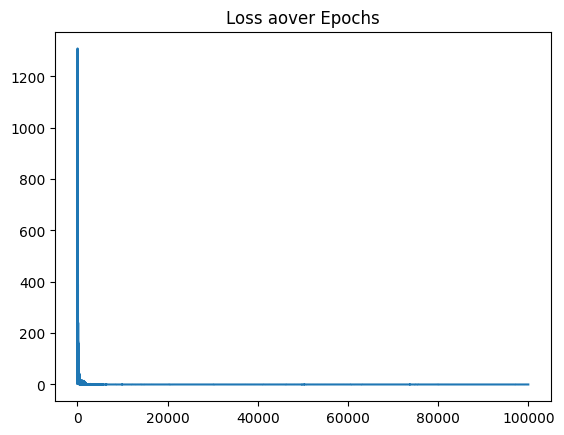

In [26]:
input_size = 10
emb_size = 16
hidden_size = 32
output_size = 10

batch_size = 1
seq_len = 10
epochs = 100000
learning_rate = 0.01
seq_len_tensor = torch.tensor([seq_len])


encoder = torch.load("./models/DG/gru_enc.pth")
tpdnencoder = TensorProductEncoder(n_roles=seq_len, n_fillers=seq_len, filler_dim=hidden_size, role_dim=hidden_size, hidden_size=hidden_size)

def generate_data(batch_size, seq_len, input_size):
    data = torch.randint(0, input_size, (batch_size, seq_len))  # fillers
    roles = torch.arange(seq_len).unsqueeze(0).expand(batch_size, -1)  # rôles
    return data, roles

criterion = nn.MSELoss()
optimizer = optim.Adam(tpdnencoder.parameters(), lr=learning_rate)

encoder.eval()
tpdnencoder.train()
losses = []
for epoch in range(epochs):

    data, roles = generate_data(batch_size, seq_len, input_size)
    roles = torch.flip(roles, dims=[1])

    encoder_output = encoder(data).squeeze(0)  
    tpdn_output = tpdnencoder(data, roles)
    # reconstructed_x = decoder(tpdn_output.unsqueeze(0), seq_len_tensor)
    loss = criterion(encoder_output, tpdn_output)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

torch.save(tpdnencoder, "./models/DG/tpdn_gru.pth")


plt.plot(losses)
plt.title('Loss aover Epochs')
plt.show()


# Bi directionel 

## **GRU**

### TRAIN

In [ ]:

input_size = 10
emb_size = 16
hidden_size = 32
output_size = 10

batch_size = 16
seq_len = 10
epochs = 50000
learning_rate = 0.001

encoder = BiGRUEncoder(input_size, emb_size, hidden_size)
decoder = BiGRUDecoder(emb_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss mieux adapté pour des classes discrètes
optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=learning_rate)

losses = []
accuracies = []

for epoch in range(epochs):
    x = generate_data(batch_size, seq_len)
    target = x.clone()

    hidden = encoder(x)
    reconstructed_x = decoder(hidden, seq_len)

    loss = criterion(reconstructed_x.view(-1, output_size), target.view(-1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = precision(reconstructed_x, target)
    losses.append(loss.item())
    accuracies.append(accuracy)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")



torch.save(encoder, "./models/BI/gru_enc.pth")
torch.save(decoder, "./models/BI/gru_dec.pth")


fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(range(epochs), losses, color='tab:blue', label='Loss')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy (%)', color='tab:orange')  
ax2.plot(range(epochs), accuracies, color='tab:orange', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:orange')


plt.title('Loss and Accuracy over Epochs')

plt.savefig(f"./resultats/BI/training_gru_{epochs}_epochs.png")
plt.show()

## **TPDN** 

### TRAIN

/tmp/ipykernel_2032505/3291806127.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder = torch.load("./models/BI/gru_enc.pth")


Époque 0/100000 - Loss: 9.441168
Époque 1000/100000 - Loss: 26.046669
Époque 2000/100000 - Loss: 2.822055
Époque 3000/100000 - Loss: 3.103365
Époque 4000/100000 - Loss: 0.997902
Époque 5000/100000 - Loss: 0.754057
Époque 6000/100000 - Loss: 0.196245
Époque 7000/100000 - Loss: 0.152641
Époque 8000/100000 - Loss: 0.074532
Époque 9000/100000 - Loss: 0.093470
Époque 10000/100000 - Loss: 0.055887
Époque 11000/100000 - Loss: 0.073962
Époque 12000/100000 - Loss: 0.101811
Époque 13000/100000 - Loss: 9.911036
Époque 14000/100000 - Loss: 0.170867
Époque 15000/100000 - Loss: 0.073997
Époque 16000/100000 - Loss: 0.059318
Époque 17000/100000 - Loss: 0.090116
Époque 18000/100000 - Loss: 0.134278
Époque 19000/100000 - Loss: 0.124027
Époque 20000/100000 - Loss: 0.152803
Époque 21000/100000 - Loss: 0.068483
Époque 22000/100000 - Loss: 0.098943
Époque 23000/100000 - Loss: 0.064348
Époque 24000/100000 - Loss: 0.082438
Époque 25000/100000 - Loss: 0.039569
Époque 26000/100000 - Loss: 0.076808
Époque 27000/

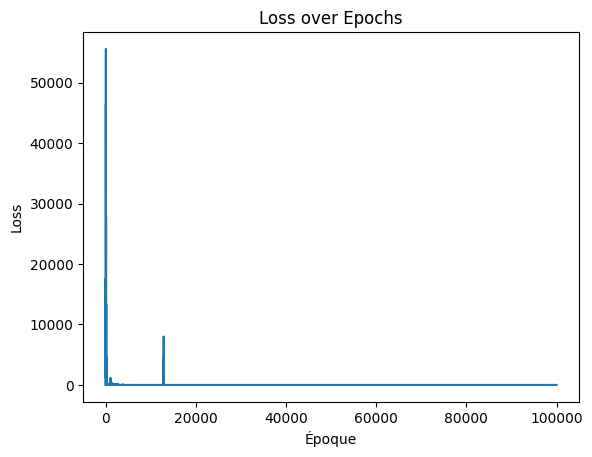

In [4]:


encoder = torch.load("./models/BI/gru_enc.pth")
encoder.eval()  

input_size = 10
hidden_size = 32
batch_size = 1
seq_len = 10
epochs = 100000
learning_rate = 0.01


tpdnencoder = TensorProductEncoder(
    n_roles=seq_len, 
    n_fillers=input_size,  
    filler_dim=2*hidden_size, 
    role_dim=2*hidden_size, 
    hidden_size=2*hidden_size
)


def generate_data(batch_size, seq_len, input_size):
    data = torch.randint(0, input_size, (batch_size, seq_len))  # Fillers (tokens)
    roles = torch.arange(seq_len).unsqueeze(0).expand(batch_size, -1)  # Rôles (positions)
    return data, roles


criterion = nn.MSELoss()
optimizer = optim.Adam(tpdnencoder.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20000, gamma=0.5)  


tpdnencoder.train()

losses = []

for epoch in range(epochs):

    data, roles = generate_data(batch_size, seq_len, input_size)
    roles = torch.cat([roles, torch.flip(roles, dims=[1])], dim=1)  # Étendre les rôles
    data = torch.cat([data, data], dim=1)  


    with torch.no_grad():
        encoder_output = encoder(data).squeeze(0) 
    tpdn_output = tpdnencoder(data, roles) 

    # print( encoder_output.shape)
    # print( tpdn_output.shape)

    loss = criterion(tpdn_output, encoder_output.detach())  
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()  


    if epoch % 1000 == 0:
        print(f"Époque {epoch}/{epochs} - Loss: {loss.item():.6f}")


torch.save(tpdnencoder, "./models/BI/tpdn_gru.pth")

plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.show()
